<H1>Analyzing Crime and Violence Through Race, Location, and Population

Genevieve Gottlieb <br/>
Big Data and Analytics, Lab 3 <br/>
10/24/16

In this lab I compare crime and police violence to location, race, and population. Using graphs and lists I analyze the data to make conclusions.

Does a higher rate of violent crime make it more likely for police to kill people? Use correlation coefficients to make your argument.

('Correlation Coefficient', 0.2162697905477716)

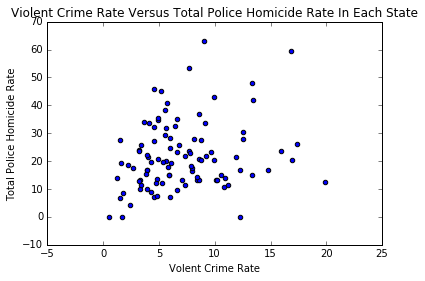

In [53]:
file = open("PoliceViolence_city.csv", "r", errors="ignore")
flist =[]
for i in file:
    flist.append(i)
del flist[0]

for i in range(len(flist)):
    flist[i]=flist[i].split(",")

#for row in flist:
#    print("Violent Crime Rate:", row[18])
#    print("Total Police Homicide Rate", row[20])
    
import matplotlib.pyplot as plt
% matplotlib inline

vcr = []
tphr = []

#for (go through each state in the above list)
#{
#    for each row
#        if this row starts with the an
#             use this to get the aver
#}

for i in range(len(flist)):
    vcr.append(float(flist[i][18]))
    tphr.append(float(flist[i][20]))
plt.scatter(vcr,tphr)
plt.title("Violent Crime Rate Versus Total Police Homicide Rate In Each State")
plt.xlabel("Volent Crime Rate")
plt.ylabel("Total Police Homicide Rate")

import numpy
"Correlation Coefficient", numpy.corrcoef(vcr, tphr)[0, 1]

Based off of this graph and its correlation coefficient, a higher rate of violent crime doesn't necessarily make it more likely for police to kill people. While looking at the graph you can see a bit of a positive linear line of best fit, it isn't close enough. While it may be true that a higher rate of violent crime and the likeliness for police to kill people do correlate, it is not close enough and is certainly not causation.

Does a larger black population by percentage make it more likely for police to kill black people? Use correlation coefficients to make your argument.

('Correlation Coefficient', -0.25895969633475452)

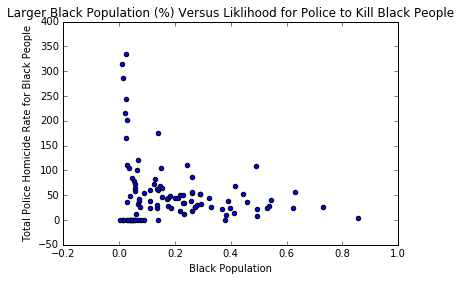

In [2]:
file = open("PoliceViolence_city.csv", "r", errors="ignore")
flist =[]
for i in file:
    flist.append(i)
del flist[0]

for i in range(len(flist)):
    flist[i]=flist[i].split(",")

#for row in flist:
#    print("Violent Crime Rate:", row[18])
#    print("Total Police Homicide Rate", row[20])
    
import matplotlib.pyplot as plt
% matplotlib inline
 
bp = []
bpkbp = []

for i in range(len(flist)):
    bp.append(float(flist[i][6])/float(flist[i][15]))
    bpkbp.append(float(flist[i][21]))
plt.scatter(bp,bpkbp)
plt.title("Larger Black Population (%) Versus Liklihood for Police to Kill Black People")
plt.xlabel("Black Population")
plt.ylabel("Total Police Homicide Rate for Black People")

import numpy
"Correlation Coefficient", numpy.corrcoef(bp, bpkbp)[0, 1]

Similar to above, a larger black population does not necessarily make it more likely for police to kill black people. The correlation coefficient is very close to zero as well, showing the lack of correlation. The fact that the correlation coefficient is slightly negative shows that in fact a smaller black population makes it more likely for police to kill black people.

In which state are you most likely to be killed by police if you are of any race?

In [40]:
file = open("PoliceViolence_city.csv", "r", errors="ignore")
flist =[]
for i in file:
    flist.append(i)
del flist[0]

for i in range(len(flist)):
    flist[i]=flist[i].split(",")

#for row in flist:
#    print("Violent Crime Rate:", row[18])
#    print("Total Police Homicide Rate", row[20])

#    import matplotlib.pyplot as plt
#    % matplotlib inline

#state = []
#tphr = []
#blob = range(100)

#for i in range(len(flist)):
#    state.append(flist[i][0])
#    tphr.append(float(flist[i][20]))
#plt.bar(blob,tphr)
#plt.title("State Versus Total Police Homicide Rate")
#plt.xlabel("State")
#plt.ylabel("Total Police Homicide Rate")
#plt.xticks(blob, state)

#import numpy
#"Correlation Coefficient", numpy.corrcoef(blob, tphr)[0, 1]



state_dict = dict()
for i in range(len(flist)):
    if flist[i][0] in state_dict:
        state_dict[flist[i][0]][0] = float(flist[i][15]) + state_dict[flist[i][0]][0]
        state_dict[flist[i][0]][1] = float(flist[i][3]) + state_dict[flist[i][0]][1]
    else:
        state_dict[flist[i][0]] = [float(flist[i][15]), float(flist[i][3])]

for k, v in state_dict.items():
    homicide_rate = (v[1] / v[0]) * 1000000
    print(k,homicide_rate)

Tennessee 18.424533494650362
Kansas 18.11191091009765
Oklahoma 41.276383717056284
Washington 26.302698313768317
Georgia 15.40618404227457
Nevada 19.82805987721584
Louisiana 21.086780210867804
North Carolina 12.159935250776776
Virginia 17.191933974377573
Indiana 25.99940828932859
Missouri 41.93186453212298
Ohio 23.91164480419421
Massachusetts 10.696609022131284
California 20.81303274268469
Nebraska 22.545594943023055
New York 6.709380071173104
Alabama 23.57211889776772
Texas 17.650287596818053
Kentucky 12.1266262311052
Alaska 19.913310720662714
Illinois 20.18999890239824
Florida 25.19913617361197
Michigan 13.144558006934483
Minnesota 33.55884879725086
Hawaii 23.720853001873948
Oregon 11.369690354604401
District of Columbia 19.730062392528072
New Jersey 11.129350880609888
Pennsylvania 13.392797353583243
Arizona 31.275856772678406
Maryland 41.699210762245535
New Mexico 26.839681216159633
Wisconsin 18.908908695970748
Colorado 21.21471343028229
Minneapolis 12.3621313303384


Based off of this data, you are most likely to be killed no matter what race you are, in Maryland. In a close second is Missouri. I had to make a dictionary to find this because there were multiple rows for some states because there were different cities, so I had to find a way to combine the same states. The dictionary took the state, and if it isn't defined in the dictionary the population and the number of people killed by police. If it has been defined, that number is added to the previous number and replaced. Then I got one population number and one number for people killed by police for every state, and divided the population by the number of people killed. I then multiplied this number by 1000000.

In which state are you most likely to be killed by police if you are black?

In [45]:
file = open("PoliceViolence_city.csv", "r", errors="ignore")
flist =[]
for i in file:
    flist.append(i)
del flist[0]

for i in range(len(flist)):
    flist[i]=flist[i].split(",")

#for row in flist:
#    print("Violent Crime Rate:", row[18])
#    print("Total Police Homicide Rate", row[20])
    
#    import matplotlib.pyplot as plt
#    % matplotlib inline

#state = []
#tphrfbp = []

#for i in range(len(flist)):
#    state.append(float(flist[i][0]))
#    tphrfbp.append(float(flist[i][21]))
#plt.bar(state,tphrfbp)
#plt.title("State Versus Total Police Homicide Rate for Black People")
#plt.xlabel("State")
#plt.ylabel("Total Police Homicide Rate for Black People")

#import numpy
#"Correlation Coefficient", numpy.corrcoef(vcr, tphrfbp)[0, 1]

state_dict = dict()

for i in range(len(flist)):
    if flist[i][0] in state_dict:
        state_dict[flist[i][0]][0] = float(flist[i][6]) + state_dict[flist[i][0]][0]
        state_dict[flist[i][0]][1] = float(flist[i][4]) + state_dict[flist[i][0]][1]
    else:
        state_dict[flist[i][0]] = [float(flist[i][6]), float(flist[i][4])]

for k, v in state_dict.items():
    homicide_rate = (v[1] / v[0]) * 1000000
    print(k,homicide_rate)

Tennessee 22.51678799751276
Kansas 23.432374168150716
Oklahoma 129.27456556942045
Washington 57.964293994899144
Georgia 22.289983772891812
Nevada 57.36294353847415
Louisiana 30.357489799883425
North Carolina 24.746120272331055
Virginia 43.84811014645268
Indiana 61.169795884037356
Missouri 82.10601939754709
Ohio 53.54086191339293
Massachusetts 43.45527365958588
California 50.26372062986998
Nebraska 77.31679784750035
New York 18.117024224909635
Alabama 25.763567738860477
Texas 43.04606726346585
Kentucky 39.44239719620902
Alaska 0.0
Illinois 44.71010654762315
Florida 51.65684548863549
Michigan 3.4096352883613803
Minnesota 68.7757909215956
Hawaii 0.0
Oregon 0.0
District of Columbia 36.53841682361577
New Jersey 20.290766686619254
Pennsylvania 16.594434779722707
Arizona 59.570693866204216
Maryland 55.98847655355298
New Mexico 201.6400053770668
Wisconsin 44.02958788305742
Colorado 22.764869253767586
Minneapolis 42.874905317917424


Based off of this data, you are most likely to be killed if you are black, in New Mexico. This question was pretty easy, because I already had the code done from the previous question. All I had to change was instead of general population and homicides, to specifically black.

Does a bigger black population lead to a higher murder rate?

('Correlation Coefficient', 0.78862516417327677)

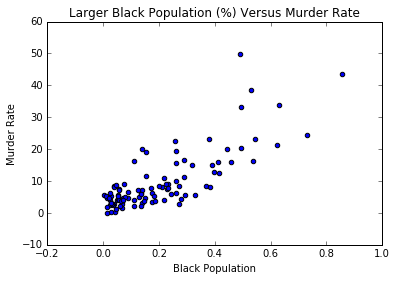

In [51]:
file = open("PoliceViolence_city.csv", "r", errors="ignore")
flist =[]
for i in file:
    flist.append(i)
del flist[0]

for i in range(len(flist)):
    flist[i]=flist[i].split(",")

import matplotlib.pyplot as plt
% matplotlib inline
 
bp = []
bpkbp = []

for i in range(len(flist)):
    bp.append(float(flist[i][6])/float(flist[i][15]))
    bpkbp.append(float(flist[i][19]))
plt.scatter(bp,bpkbp)
plt.title("Larger Black Population (%) Versus Murder Rate")
plt.xlabel("Black Population")
plt.ylabel("Murder Rate")

import numpy
"Correlation Coefficient", numpy.corrcoef(bp, bpkbp)[0, 1]

By finding the black population and the murder rate, I found that there is a positive correlation between the murder rate and black population. Visually you can see a positive linearity, and the correlation coefficient at 0.7 is pretty close to 1 so it is fairly correlative.

('Correlation Coefficient', -0.29644737310629388)

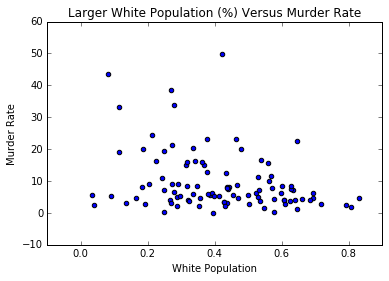

In [50]:
file = open("PoliceViolence_city.csv", "r", errors="ignore")
flist =[]
for i in file:
    flist.append(i)
del flist[0]

for i in range(len(flist)):
    flist[i]=flist[i].split(",")

import matplotlib.pyplot as plt
% matplotlib inline
 
bp = []
bpkbp = []

for i in range(len(flist)):
    bp.append(float(flist[i][7])/float(flist[i][15]))
    bpkbp.append(float(flist[i][19]))
plt.scatter(bp,bpkbp)
plt.title("Larger White Population (%) Versus Murder Rate")
plt.xlabel("White Population")
plt.ylabel("Murder Rate")

import numpy
"Correlation Coefficient", numpy.corrcoef(bp, bpkbp)[0, 1]

After finding the murder rate and black population correlation, I wanted to find it for white people, and found it was not a good correlation. The correlation coefficient is negative, and close to zero, so it isn't correlated. Looking at the graph the data points are all over the place.

Correlation Coefficient -0.2165800254


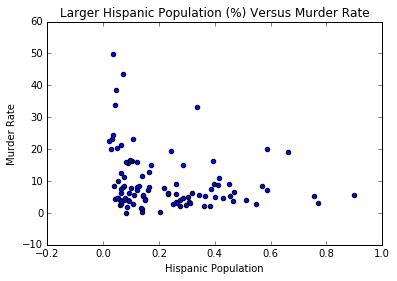

In [54]:
file = open("PoliceViolence_city.csv", "r", errors="ignore")
flist =[]
for i in file:
    flist.append(i)
del flist[0]

for i in range(len(flist)):
    flist[i]=flist[i].split(",")

import matplotlib.pyplot as plt
% matplotlib inline
 
bp = []
bpkbp = []

for i in range(len(flist)):
    bp.append(float(flist[i][14])/float(flist[i][15]))
    bpkbp.append(float(flist[i][19]))
plt.scatter(bp,bpkbp)
plt.title("Larger Hispanic Population (%) Versus Murder Rate")
plt.xlabel("Hispanic Population")
plt.ylabel("Murder Rate")

import numpy
"Correlation Coefficient", numpy.corrcoef(bp, bpkbp)[0, 1]

After finding the murder rate for black and white population, I found it for hispanics, and found it is similar to the white population's correlation coefficient. The graph is not linear, and the correlation coefficient is negative and close to zero. So the murder rate and the hispanic population is not correlated.

Some of these questions were very hard to come to, as there were quite a few detailed steps. After thinking everything through though, I came up with answers for each. I found that location, as expected, greatly varies the results. That is a big variable throughout this lab, and made my answers very interesting. A few of the graphs were totally uncorrelated, which was dissapointing, but makes sense as many things are that way. Overall this was a very educational lab, regarding coding and violence throughout America.